In [12]:
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# ONE-SAMPLE TEST
glucose = df['avg_glucose_level'].dropna()

reference_value = 100

t_stat, p_value = stats.ttest_1samp(glucose, reference_value)

print("One-Sample t-test for avg_glucose_level vs reference =", reference_value)
print(f"Sample Mean = {glucose.mean():.2f}")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value     = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: Reject H0. The mean glucose level differs significantly from {reference_value}.")
else:
    print(f"Conclusion: Fail to reject H0. The mean glucose level is not significantly different from {reference_value}.")

One-Sample t-test for avg_glucose_level vs reference = 100
Sample Mean = 106.15
t-statistic = 9.7047
p-value     = 0.0000
Conclusion: Reject H0. The mean glucose level differs significantly from 100.


In [6]:
df = df.dropna(subset=['gender', 'avg_glucose_level'])

group1 = df[df['gender'] == 'Male']['avg_glucose_level']
group2 = df[df['gender'] == 'Female']['avg_glucose_level']


In [9]:
# TWO SAMPLE TEST
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Means are significantly different")
else:
    print("Fail to reject H0: No significant difference in means")


T-statistic: 3.8601
P-value: 0.0001
Reject H0: Means are significantly different


In [10]:
# Drop missing values if any
df = df.dropna(subset=['work_type', 'avg_glucose_level'])

# Get the numeric values for each group
groups = [df[df['work_type'] == grp]['avg_glucose_level'] for grp in df['work_type'].unique()]


In [15]:
# ONE WAY ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat: .4f}")
print(f"P-value: {p_value: .4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject H0: At least one group's mean is significantly different")
else:
    print("Fail to reject H0: No significant difference across groups")


F-statistic:  16.6123
P-value:  0.0000
Reject H0: At least one group's mean is significantly different


In [16]:
# TUKEYS HSD

import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

df = df.dropna(subset=['work_type', 'avg_glucose_level'])

In [17]:
tukey = pairwise_tukeyhsd(endog=df['avg_glucose_level'],
                          groups=df['work_type'],
                          alpha=0.05)


print(tukey.summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
     Govt_job  Never_worked  -11.737 0.7496  -38.357 14.8829  False
     Govt_job       Private  -0.9829 0.9868  -6.2855  4.3196  False
     Govt_job Self-employed   4.8657  0.236  -1.5669 11.2982  False
     Govt_job      children -13.3795    0.0 -20.0815 -6.6775   True
 Never_worked       Private  10.7541 0.7979 -15.5293 37.0375  False
 Never_worked Self-employed  16.6027 0.4294  -9.9318 43.1372  False
 Never_worked      children  -1.6425 0.9998 -28.2435 24.9586  False
      Private Self-employed   5.8486  0.009   0.9932  10.704   True
      Private      children -12.3966    0.0 -17.6037 -7.1894   True
Self-employed      children -18.2452    0.0 -24.5993 -11.891   True
-------------------------------------------------------------------


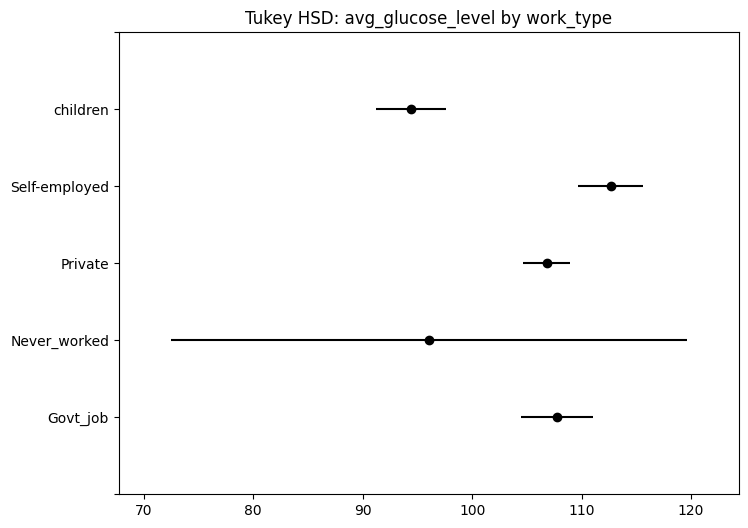

In [18]:
import matplotlib.pyplot as plt

tukey.plot_simultaneous(figsize=(8,6))
plt.title("Tukey HSD: avg_glucose_level by work_type")
plt.show()
